Objective: Classify a new patients who had undergone surgery for breast cancer will survive 5 years 
or longer OR die within 5 year.

In [3]:
#importing all the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

data_set = pd.read_csv("haberman.csv")
data_set.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
print(data_set.shape)
#it shows how many columns and rows present in dataset

(306, 4)


In [5]:
print(data_set.columns)
#what are different columns present in dataset along wdh class label-status

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [6]:
#How many data points for each class are present? 
data_set["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

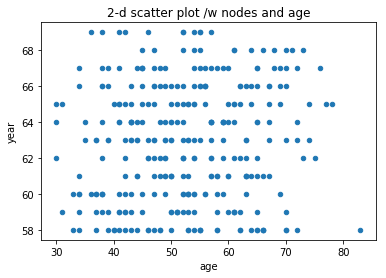

In [7]:
#2d scatter plot
#******************************************************************************
data_set.plot(kind='scatter',x='age',y='year')
plt.title("2-d scatter plot /w nodes and age")
plt.show()
#this plot doesn't give any information about the classes

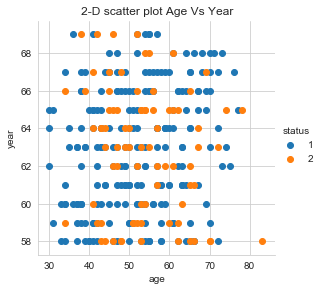

In [8]:
#2d scatter plot with different colors 
#*************************************************
sns.set_style("whitegrid");
sns.FacetGrid(data_set, hue="status", height=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.title('2-D scatter plot Age Vs Year')
plt.show();

BY observation of above,classes are overlap eachother.
The plot gives us a rough idea that both the classes are mixed and and not easily distinguishable.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


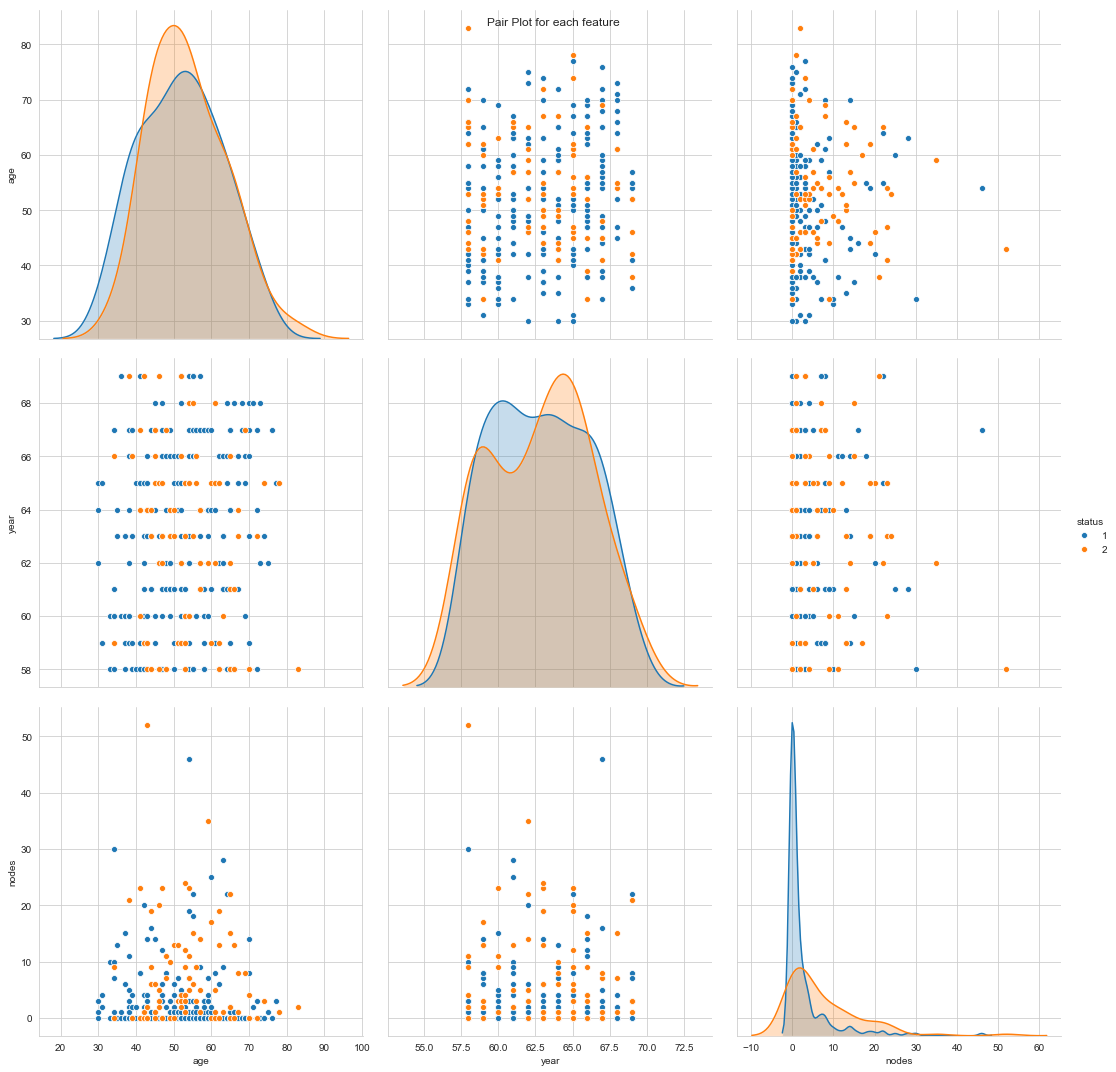

In [9]:
#pair plots
#this pair plot gives class dependancies w.r.to each variable/feature
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data_set, hue="status",vars=["age", "year","nodes"], height=5);
plt.suptitle('Pair Plot for each feature')
plt.show()

By observation of above plot, classes are not easily separable.#Every variable has the mixed representation of both the classes.
That's why we can't draw a linearly separable line from any of them(Plots).

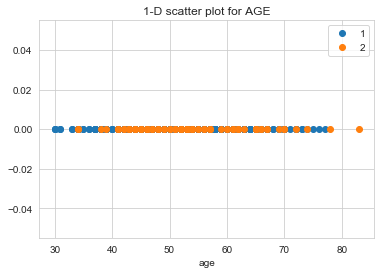

In [10]:
#Histogram, pdf, cdf
#1-D scatter plot of AGE
#***************************************
haber_one = data_set.loc[data_set["status"] == 1];
haber_two = data_set.loc[data_set["status"] == 2];

plt.plot(haber_one["age"], np.zeros_like(haber_one['age']), 'o')
plt.plot(haber_two["age"], np.zeros_like(haber_two['age']), 'o')
plt.legend('12')
plt.xlabel("age")
plt.title('1-D scatter plot for AGE')
plt.show()

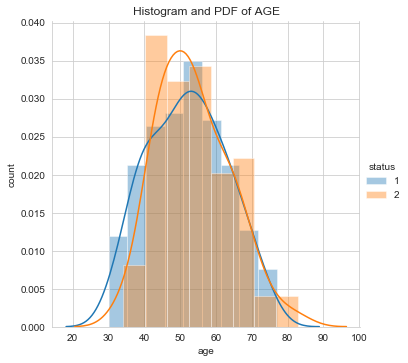

In [11]:
# Histogram and PDF of AGE for both classes
#****************************************************************
sns.FacetGrid(data_set, hue="status", height=5) \
   .map(sns.distplot, "age") \
       .add_legend();
plt.title('Histogram and PDF of AGE')
plt.ylabel('count')
plt.show()

The mean of the both classes approximately equal.

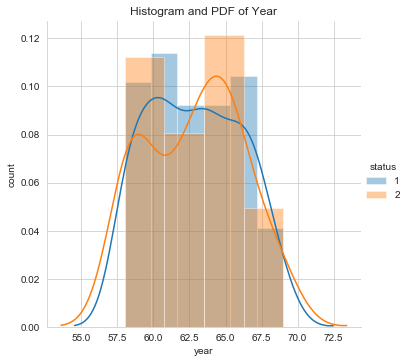

In [12]:
# Histogram and PDF of Op_Year for both classes
#************************************************
sns.FacetGrid(data_set, hue="status", height=5) \
   .map(sns.distplot, "year") \
       .add_legend();
plt.title('Histogram and PDF of Year')
plt.ylabel('count')
plt.show();

In [13]:
#With respect to  "Year" both the classes are overlaped and this feature not readily differentiate them.

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


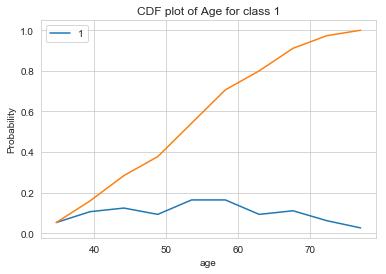

In [14]:
#CDF 
# CDF plot of Age for class 1
#***************************************************************************************************
counts, bin_edges = np.histogram(haber_one['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend('1')
plt.xlabel("age")
plt.ylabel("Probability")
plt.title("CDF plot of Age for class 1")
plt.show();

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


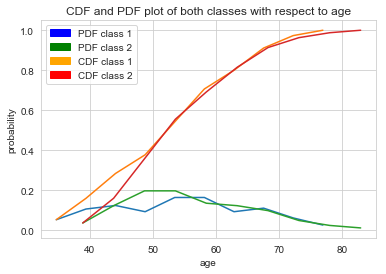

In [15]:
#CDF plot of Age for both classes
#********************************************************************
counts, bin_edges = np.histogram(haber_one['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



counts, bin_edges = np.histogram(haber_two['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("age")
blue_patch = mpatches.Patch(color='blue', label='PDF class 1')
green_patch = mpatches.Patch(color='green', label='PDF class 2')
orange_patch = mpatches.Patch(color='orange', label='CDF class 1')
red_patch = mpatches.Patch(color='red', label='CDF class 2')
plt.legend(handles=[blue_patch,green_patch,orange_patch,red_patch])
plt.ylabel("probability")
plt.title("CDF and PDF plot of both classes with respect to age")
plt.show();


PDF of both classes first intersect at 44,
If we take this point then with 30% of probability we can say survival rate are high for age group 10 to 44 and 
There is 18% of probability of being wrong.

In [16]:
#Mean, Variance, Standard-dev,  
#******************************************************

print("mean:")
print('mean of class 1 is:',np.mean(data_set["age"]))
#Mean with an outlier.
#******************************************************

print('mean with outlier is:',np.mean(np.append(data_set["age"],2240)));
print('mean of class 2 is: ',np.mean(data_set["age"]))

print("\nStandard-dev:");
print('STD of class 1 is:',np.std(haber_one["age"]))
print('STD of class 2 is:',np.std(haber_two["age"]))

mean:
mean of class 1 is: 52.45751633986928
mean with outlier is: 59.583061889250814
mean of class 2 is:  52.45751633986928

Standard-dev:
STD of class 1 is: 10.98765547510051
STD of class 2 is: 10.10418219303131


Mean for survived and died patients are Almost closer,
but by adding outlier as 2240 in survived we can observe the increase in mean of class 1.
Thus, mean can be easily corrupted by outlier.
The SD of both class are nearly same.

In [17]:
#Median, Quantiles, Percentiles, IQR.
#*****************************************************

print("\nmedians:")
print('median of class 1 is:',np.median(haber_one["age"]))
#Median with an outlier
#********************************************************

print('median with outlier is:',np.median(np.append(haber_one["age"],2240)));
print('median of class 2 is:',np.median(haber_two["age"]))

print("\nQuantiles:")
print(np.percentile(haber_one["age"],np.arange(0, 100, 25)))
print(np.percentile(haber_two["age"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haber_one["age"],90))
print(np.percentile(haber_two["age"],90))

print("\n85th Percentiles:")
print(np.percentile(haber_one["age"],85))
print(np.percentile(haber_two["age"],85))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haber_one["age"]))
print(robust.mad(haber_two["age"]))


medians:
median of class 1 is: 52.0
median with outlier is: 52.0
median of class 2 is: 53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

85th Percentiles:
64.0
65.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


Median for survived class(1) with and without outlier is same,
declaring there is no or very little effect of outlier on median statistics.
Thus, Median cannot be easily corrupted by outlier.
Age at Quantiles of 0%, 25%, 50%, 75% is 30, 43, 52, 60 respectively 
for class 1 and 34, 46, 53, 61 respectively for class 2.
The 90th Percentiles values for class 1 and 2 are 67.0 each.
The 85th Percentiles values for class 1 and 2 are 64, 65 respectively.
Median Absolute Deviation is different for both the classes.

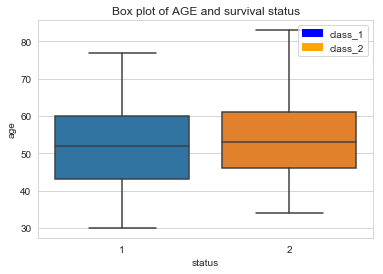

In [18]:
#Box plots
#************************************************************************
sns.boxplot(x='status',y='age', data=data_set).set_title('Box plot of AGE and survival status')
blue_patch = mpatches.Patch(color='blue', label='class_1')
orange_patch = mpatches.Patch(color='orange', label='class_2')
plt.legend(handles=[blue_patch,orange_patch],loc=1)
plt.show()

By observation of boxplots 
The 25% to 75% values for class 1 w.r.t Age,lies between 43 to 60 of age,For class 2 it is 47 to 61 of age.
The mean value for class 1 is 52 and for class 2 is 53.
The Whiskers for class 2 are farther than class 1.

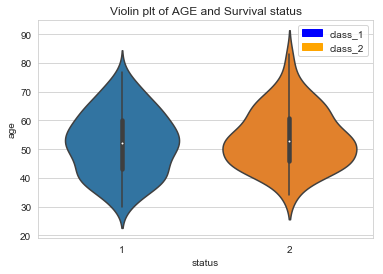

In [19]:
#violin plot
#****************************************************************************
sns.violinplot(x="status", y="age", data=data_set, size=8)
plt.title('Violin plt of AGE and Survival status')
blue_patch = mpatches.Patch(color='blue', label='class_1')
orange_patch = mpatches.Patch(color='orange', label='class_2')
plt.legend(handles=[blue_patch,orange_patch],loc=1)
plt.show()


by observation of violin plot.
This plot gives the combined information of PDF and box plot.
The curve denotes the PDF and middle area denotes box plot.

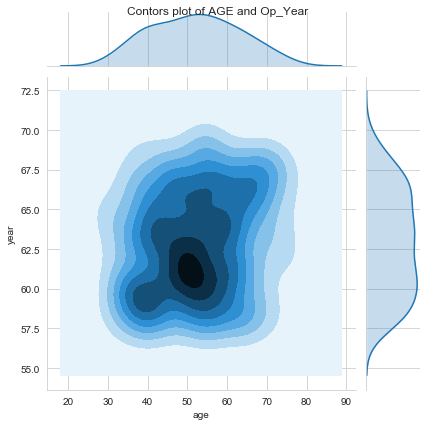

In [20]:
#contors plot
#2D Density plot, contors-plot
sns.jointplot(x="age", y="year", data=haber_one, kind="kde");
plt.suptitle('Contors plot of AGE and Op_Year')
plt.show();

By obsevation of contors-plot.
The year from 60 to 62 has the age group of patients between 47 to 53.
The plot shows the PDF of features on the side.

Conclusions::
1. Firstly understand the problem statement clearly then go for analysis on data.
2. According to data, we need to compute further steps like cdf,pdf,univariant etc.
3. once it is done, go for preprocessing steps.
4. By eda,we need to appply a model/algorith on data set.
        